# Direct Resistance

In [1]:
from pathlib import Path
import pandas as pd
data_dir = Path("/home/kcv/Desktop/Rate_Capability/Data")

# pick a sample file (first one alphabetically here)
sample_path = sorted(data_dir.glob("RD_RateCapability_*.csv"))[0]
print(f"Inspecting {sample_path.name}")

df = pd.read_csv(sample_path)
df.columns

Inspecting RD_RateCapability_0001.csv


Index(['record number', 'sequence number of step', 'cycle no', 'step no',
       'step name', 'absolute time', 'record time(m)', 'step time(h:m:s.ms)',
       'volt(v)', 'current(a)', 'capacity(ah)', 'energy(wh)', 'power(mw)',
       'internal r(ω)', 'charging energy(wh)', 'discharge energy(wh)',
       'charging capacity(ah)', 'discharge capacity(ah)', 'cum charge e(wh)',
       'cum discharge e(wh)', 'cum charge c(ah)', 'cum discharge c(ah)',
       'chamber t(℃)', 'chamber h(%)', 'ripple f(hz)', 'ripple current(a)',
       'total capacity(ah)', 'dischargevolt(v)', 'dischargecurrent(a)',
       'dischargepower(mw)', 'water chiller outlet pressure(bar)',
       'water chiller return water pressure(bar)',
       'water chiller set flow(l/min)', 'water chiller set temperature(℃)',
       'current water chiller temperature(℃)',
       'current water chiller flow rate(l/min)', 'water chiller status',
       'water chiller mode', 'water chiller return water temperature(℃)',
       'soc cal

In [2]:
from utils.resistance_analysis import process_data_directory

process_data_directory(
    data_dir="/home/kcv/Desktop/Rate_Capability/Data",
    output_dir="/home/kcv/Desktop/Rate_Capability/results/data/resistance_data",
)


[PosixPath('/home/kcv/Desktop/Rate_Capability/results/data/resistance_data/RD_RateCapability_0001_resistance.csv'),
 PosixPath('/home/kcv/Desktop/Rate_Capability/results/data/resistance_data/RD_RateCapability_0003_resistance.csv'),
 PosixPath('/home/kcv/Desktop/Rate_Capability/results/data/resistance_data/RD_RateCapability_0004_resistance.csv'),
 PosixPath('/home/kcv/Desktop/Rate_Capability/results/data/resistance_data/RD_RateCapability_0007_resistance.csv'),
 PosixPath('/home/kcv/Desktop/Rate_Capability/results/data/resistance_data/RD_RateCapability_0011_resistance.csv'),
 PosixPath('/home/kcv/Desktop/Rate_Capability/results/data/resistance_data/RD_RateCapability_0012_resistance.csv'),
 PosixPath('/home/kcv/Desktop/Rate_Capability/results/data/resistance_data/RD_RateCapability_0025_resistance.csv'),
 PosixPath('/home/kcv/Desktop/Rate_Capability/results/data/resistance_data/RD_RateCapability_0034_resistance.csv'),
 PosixPath('/home/kcv/Desktop/Rate_Capability/results/data/resistance_da

In [3]:
from pathlib import Path
from utils.soc_resistance_plots import generate_soc_resistance_pdf

generate_soc_resistance_pdf(
    soc_dir=Path("/home/kcv/Desktop/Rate_Capability/results/data/soc_data"),
    resistance_dir=Path("/home/kcv/Desktop/Rate_Capability/results/data/resistance_data"),
    output_pdf=Path("/home/kcv/Desktop/Rate_Capability/results/plots/soc_vs_resistance.pdf"),
    c_rate_stats_path=Path("/home/kcv/Desktop/Rate_Capability/results/data/c_rate_stats.csv"),
)


[PosixPath('/home/kcv/Desktop/Rate_Capability/results/data/resistance_data/RD_RateCapability_0001_resistance.csv'),
 PosixPath('/home/kcv/Desktop/Rate_Capability/results/data/resistance_data/RD_RateCapability_0003_resistance.csv'),
 PosixPath('/home/kcv/Desktop/Rate_Capability/results/data/resistance_data/RD_RateCapability_0004_resistance.csv'),
 PosixPath('/home/kcv/Desktop/Rate_Capability/results/data/resistance_data/RD_RateCapability_0007_resistance.csv'),
 PosixPath('/home/kcv/Desktop/Rate_Capability/results/data/resistance_data/RD_RateCapability_0011_resistance.csv'),
 PosixPath('/home/kcv/Desktop/Rate_Capability/results/data/resistance_data/RD_RateCapability_0012_resistance.csv'),
 PosixPath('/home/kcv/Desktop/Rate_Capability/results/data/resistance_data/RD_RateCapability_0025_resistance.csv'),
 PosixPath('/home/kcv/Desktop/Rate_Capability/results/data/resistance_data/RD_RateCapability_0034_resistance.csv'),
 PosixPath('/home/kcv/Desktop/Rate_Capability/results/data/resistance_da

# Apparent Direct Resistance

In [1]:
from utils.adr_analysis import process_directory

ocv_dir = "/home/kcv/Desktop/Rate_Capability/results/data/ocv_power_data"
out_dir = "/home/kcv/Desktop/Rate_Capability/results/data/adr_data"

paths = process_directory(ocv_dir=ocv_dir, output_dir=out_dir)
print(f"Wrote {len(paths)} ADR files to {out_dir}")


Wrote 21 ADR files to /home/kcv/Desktop/Rate_Capability/results/data/adr_data


/tmp/ipykernel_1271176/906140826.py:59: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap("viridis", max(len(rates), 1))


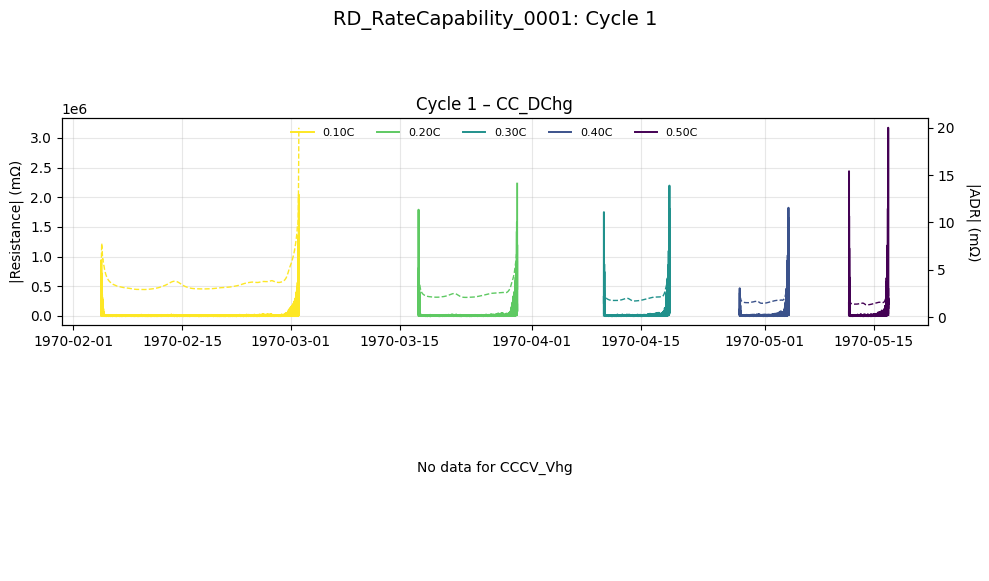

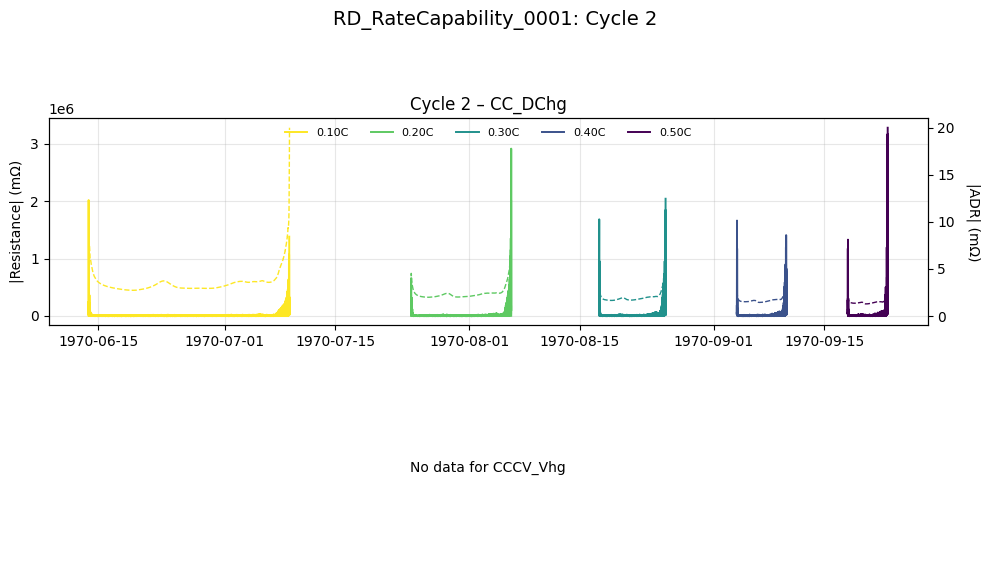

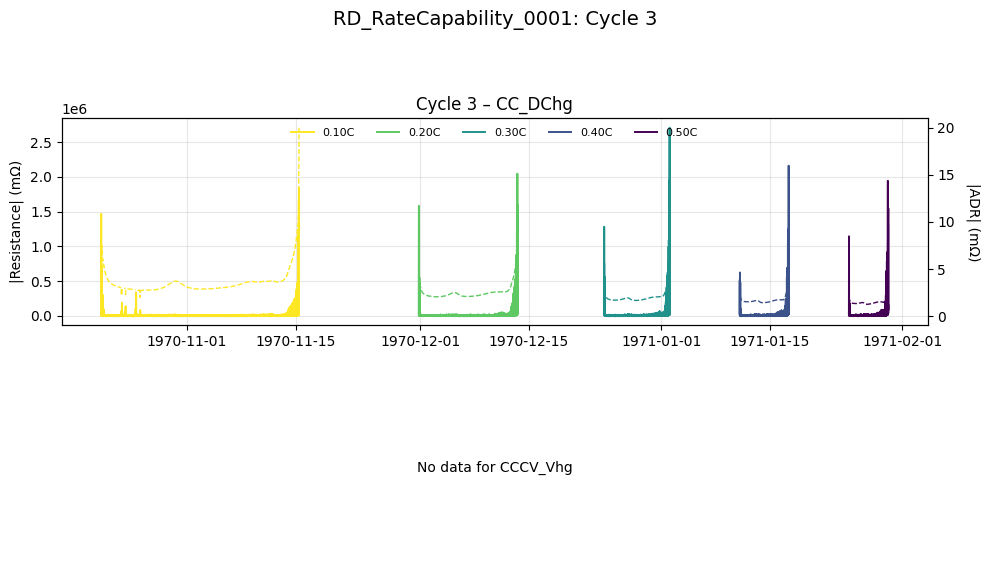

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from matplotlib.cm import get_cmap

ADR_DIR = Path("/home/kcv/Desktop/Rate_Capability/results/data/adr_data")
cell_name = "RD_RateCapability_0001"
step_order = ("CC_DChg", "CCCV_Vhg")
CRATE_SKIP = 0.33
CRATE_TOL = 0.01  # adjust tolerance if needed

df = pd.read_csv(ADR_DIR / f"{cell_name}_adr_data.csv")

# timestamps
if "absolute time" in df.columns:
    df["absolute time"] = pd.to_datetime(df["absolute time"])
elif "record time(m)" in df.columns:
    df["absolute time"] = pd.to_timedelta(df["record time(m)"], unit="m")
else:
    df["absolute time"] = pd.to_datetime(df.index, unit="m")

numeric_cols = ["c_rate", "current(a)", "volt(v)", "OCV", "soc(%)",
                "resistance(ohm)", "apparent_direct_resistance(ohm)"]
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

# convert to |mΩ|
df["resistance(ohm)"] = df["resistance(ohm)"].abs() * 1e3
df["apparent_direct_resistance(ohm)"] = df["apparent_direct_resistance(ohm)"].abs() * 1e3

mask = df["step name"].str.strip().isin(step_order)
df = df[mask]

# drop ~0.33C rows
if "c_rate" in df.columns:
    skip_mask = np.isclose(df["c_rate"].abs(), CRATE_SKIP, atol=CRATE_TOL)
    df = df[~skip_mask]

cycles = sorted(df["cycle no"].dropna().unique())

for cycle in cycles:
    cycle_df = df[df["cycle no"] == cycle]
    if cycle_df.empty:
        continue

    fig, axes = plt.subplots(len(step_order), 1, figsize=(10, 6), sharex=False)
    axes = np.atleast_1d(axes)

    for ax, step in zip(axes, step_order):
        step_df = cycle_df[cycle_df["step name"].str.strip() == step]
        if step_df.empty:
            ax.text(0.5, 0.5, f"No data for {step}", ha="center", va="center")
            ax.axis("off")
            continue

        rates = sorted(step_df["c_rate"].dropna().unique())
        cmap = get_cmap("viridis", max(len(rates), 1))
        rate_colors = {rate: cmap(idx) for idx, rate in enumerate(rates)}
        ax2 = ax.twinx()

        handles, labels = [], []
        for _, grp in step_df.groupby("step no"):
            grp = grp.sort_values("absolute time")
            rate = grp["c_rate"].iloc[0]
            label = f"{abs(rate):.2f}C" if pd.notna(rate) else "Unknown C-rate"
            color = rate_colors.get(rate, "tab:gray")

            h = ax.plot(grp["absolute time"], grp["resistance(ohm)"], color=color, linewidth=1.4)[0]
            ax2.plot(grp["absolute time"], grp["apparent_direct_resistance(ohm)"],
                     color=color, linestyle="--", linewidth=1)
            handles.append(h)
            labels.append(label)

        ax.set_ylabel("|Resistance| (mΩ)")
        ax2.set_ylabel("|ADR| (mΩ)", rotation=-90, labelpad=18)
        ax.set_title(f"Cycle {cycle} – {step}")
        ax.grid(alpha=0.3)
        ax.legend(handles, labels, fontsize=8, loc="upper center",
                  ncol=len(labels), frameon=False)

    axes[-1].set_xlabel("Absolute Time")
    fig.suptitle(f"{cell_name}: Cycle {cycle}", fontsize=14, y=0.96)
    fig.tight_layout(rect=[0, 0, 1, 0.9])
    plt.show()


/tmp/ipykernel_1271176/1523940406.py:52: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap("viridis", max(len(rates), 1))
/tmp/ipykernel_1271176/1523940406.py:52: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap("viridis", max(len(rates), 1))


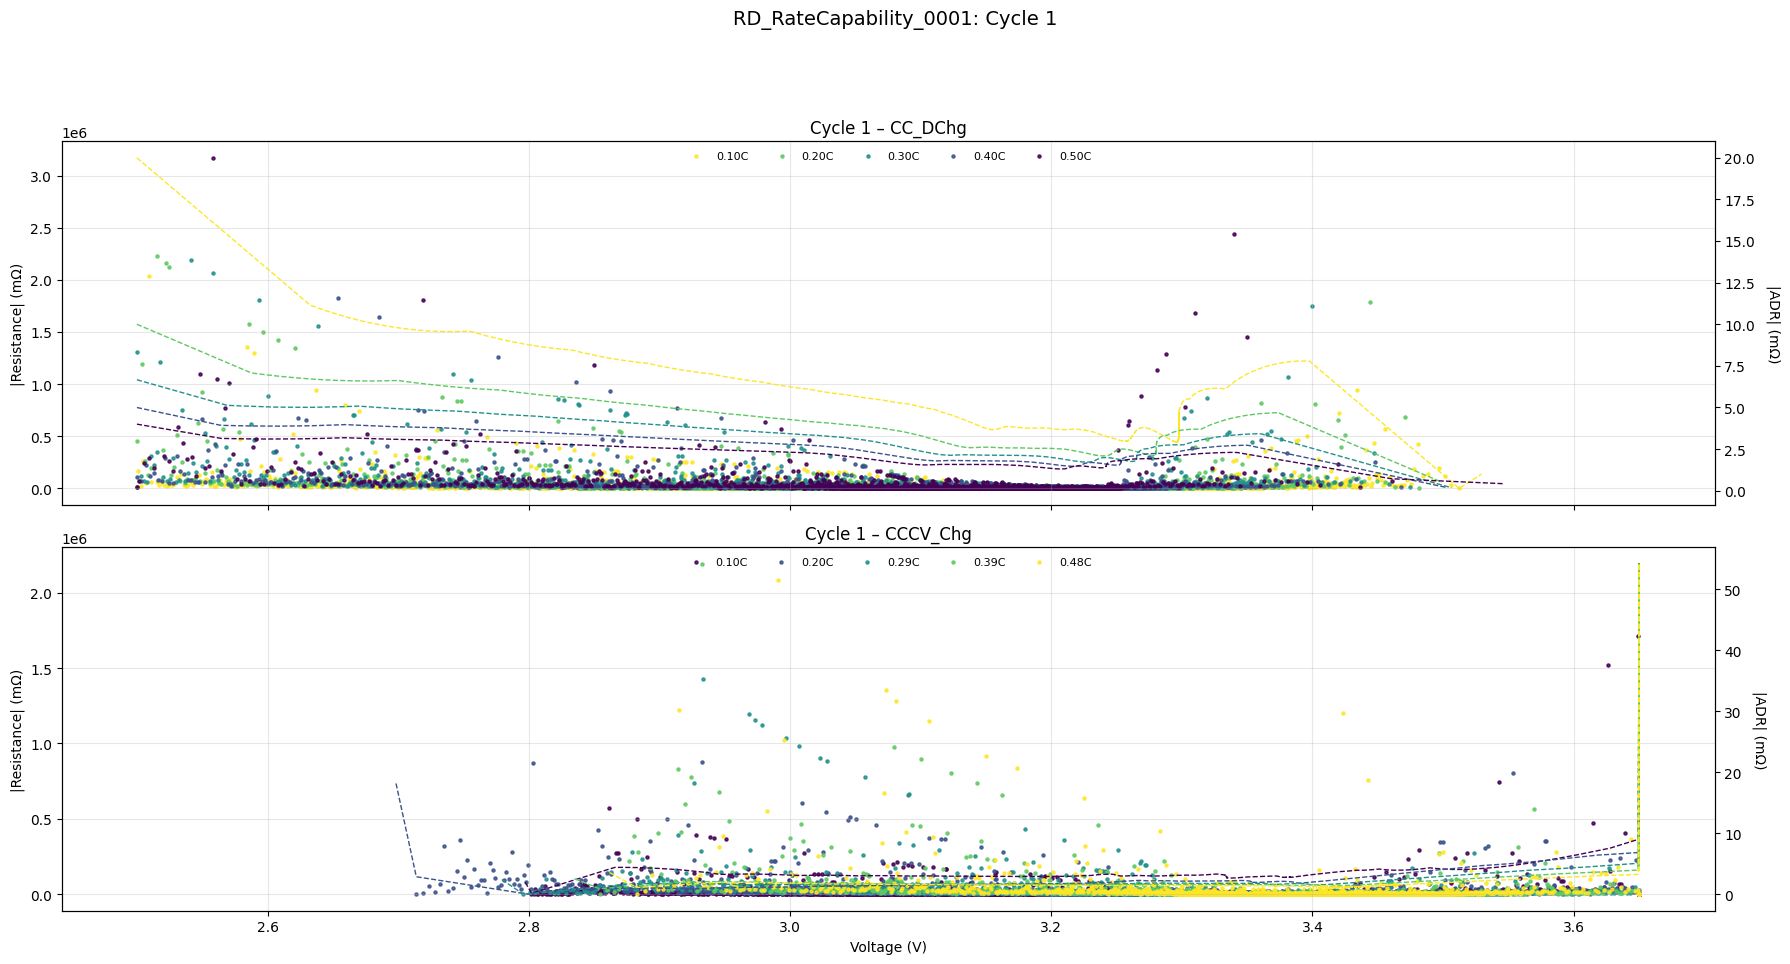

/tmp/ipykernel_1271176/1523940406.py:52: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap("viridis", max(len(rates), 1))
/tmp/ipykernel_1271176/1523940406.py:52: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap("viridis", max(len(rates), 1))


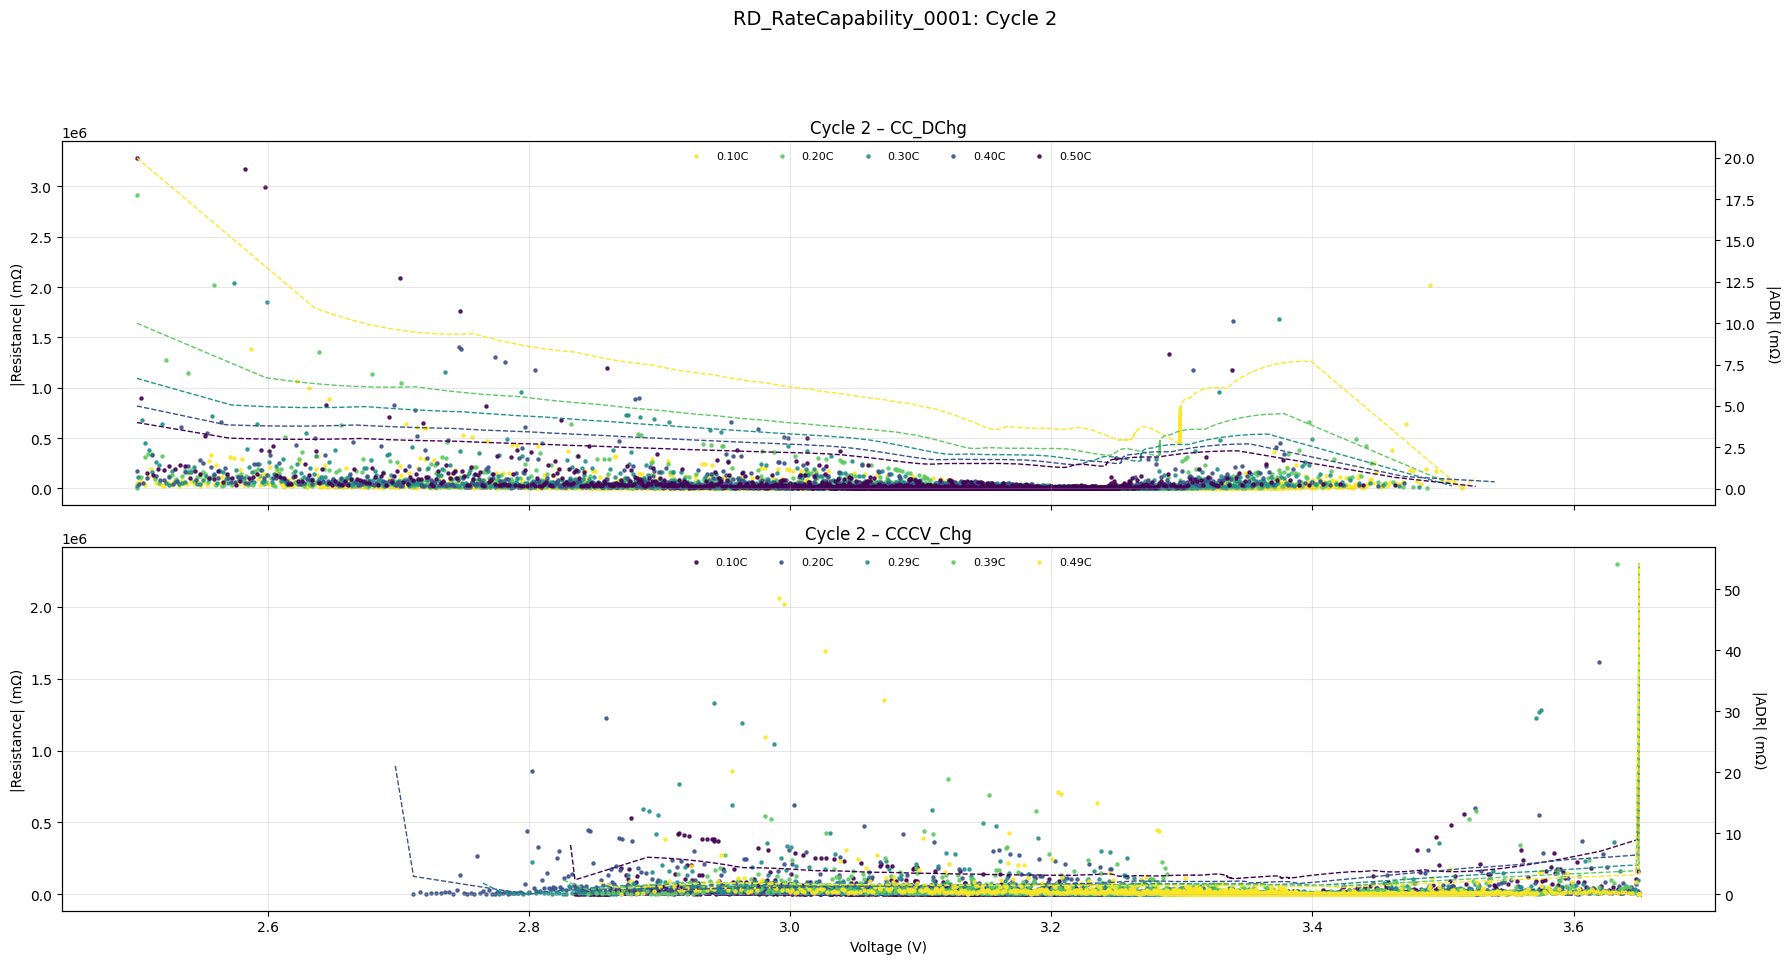

/tmp/ipykernel_1271176/1523940406.py:52: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap("viridis", max(len(rates), 1))
/tmp/ipykernel_1271176/1523940406.py:52: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap("viridis", max(len(rates), 1))


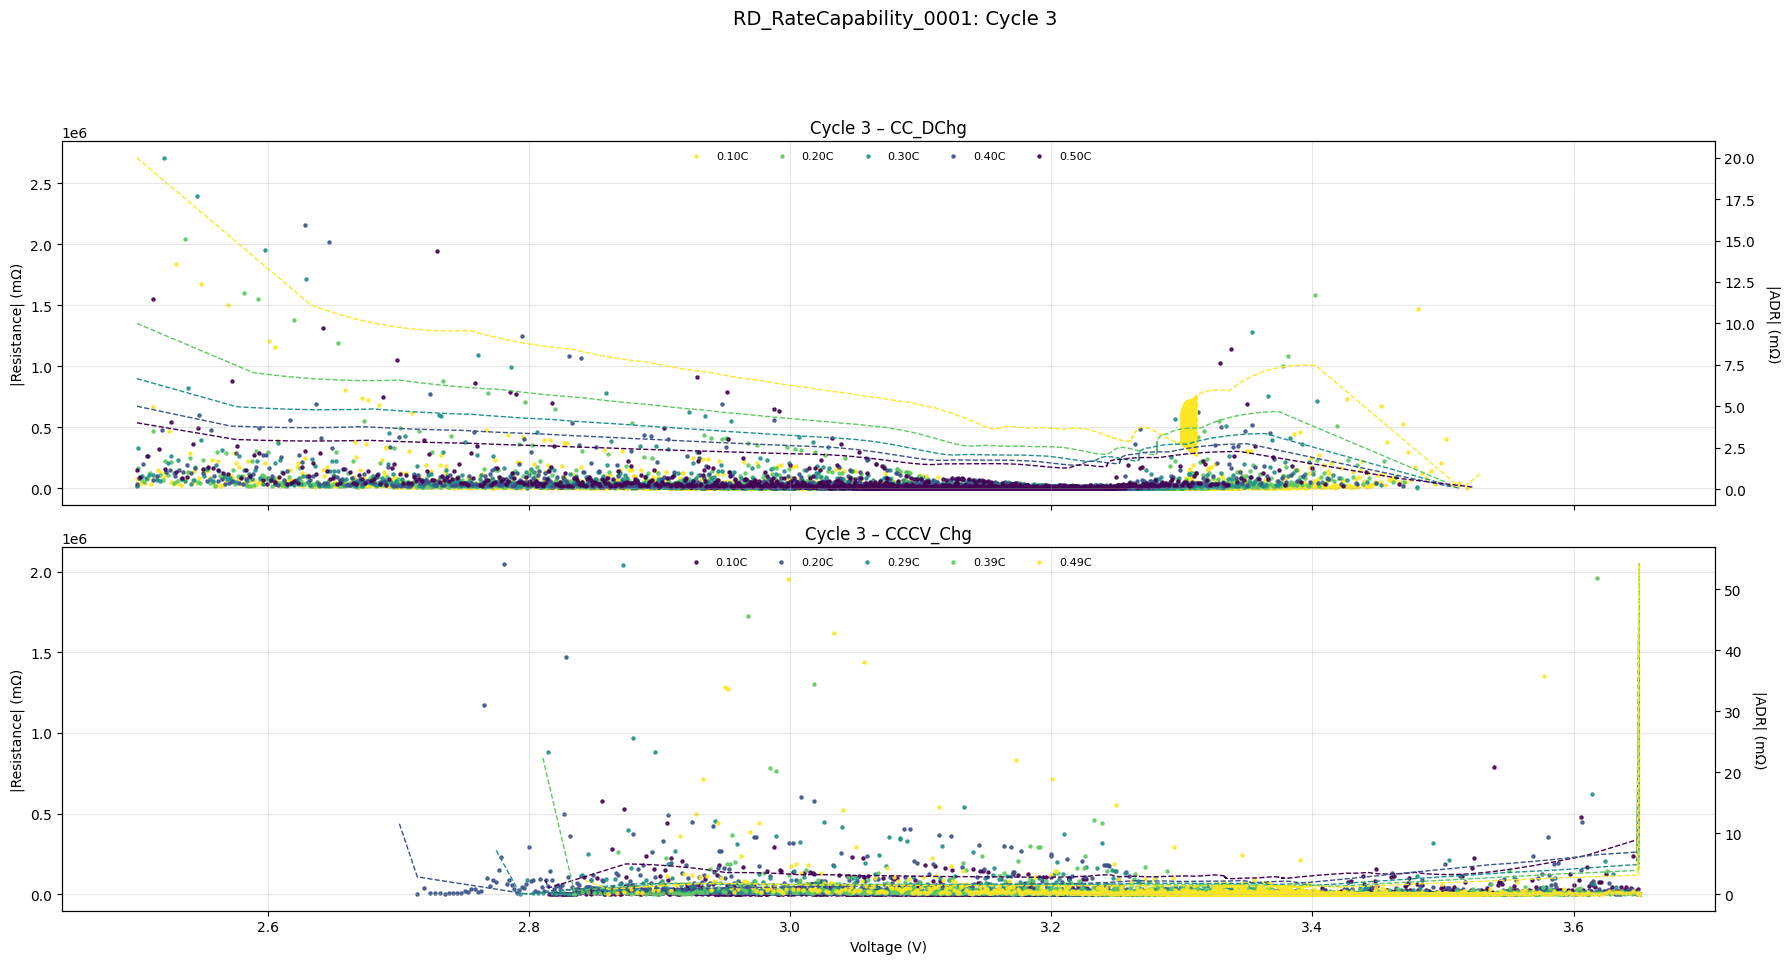

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from pathlib import Path

ADR_DIR = Path("/home/kcv/Desktop/Rate_Capability/results/data/adr_data")
cell_name = "RD_RateCapability_0001"
step_order = ("CC_DChg", "CCCV_Chg")
CRATE_SKIP = 0.33
CRATE_TOL = 0.01  # tolerance around 0.33C

df = pd.read_csv(ADR_DIR / f"{cell_name}_adr_data.csv")

# numeric conversions
numeric_cols = ["c_rate", "current(a)", "volt(v)", "OCV", "soc(%)",
                "resistance(ohm)", "apparent_direct_resistance(ohm)"]
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

# convert |Ω| to |mΩ|
df["resistance(ohm)"] = df["resistance(ohm)"].abs() * 1e3
df["apparent_direct_resistance(ohm)"] = df["apparent_direct_resistance(ohm)"].abs() * 1e3

mask = df["step name"].str.strip().isin(step_order)
df = df[mask]

if "c_rate" in df.columns:
    skip_mask = np.isclose(df["c_rate"].abs(), CRATE_SKIP, atol=CRATE_TOL)
    df = df[~skip_mask]

cycles = sorted(df["cycle no"].dropna().unique())

for cycle in cycles:
    cycle_df = df[df["cycle no"] == cycle]
    if cycle_df.empty:
        continue

    fig, axes = plt.subplots(len(step_order), 1, figsize=(18, 10), sharex=True)
    axes = np.atleast_1d(axes)

    for ax, step in zip(axes, step_order):
        step_df = cycle_df[cycle_df["step name"].str.strip() == step]
        if step_df.empty:
            ax.text(0.5, 0.5, f"No data for {step}", ha="center", va="center")
            ax.axis("off")
            continue

        step_df = step_df.dropna(subset=["volt(v)"])
        rates = sorted(step_df["c_rate"].dropna().unique())
        cmap = get_cmap("viridis", max(len(rates), 1))
        rate_colors = {rate: cmap(idx) for idx, rate in enumerate(rates)}
        ax2 = ax.twinx()

        handles, labels = [], []
        for _, grp in step_df.groupby("step no"):
            grp = grp.sort_values("volt(v)")
            rate = grp["c_rate"].iloc[0]
            label = f"{abs(rate):.2f}C" if pd.notna(rate) else "Unknown C-rate"
            color = rate_colors.get(rate, "tab:gray")

            h = ax.scatter(
                grp["volt(v)"], grp["resistance(ohm)"],
                color=color, s=5, alpha=0.85
            )
            ax2.plot(
                grp["volt(v)"], grp["apparent_direct_resistance(ohm)"],
                color=color, linestyle="--", linewidth=1
            )
            handles.append(h)
            labels.append(label)

        ax.set_ylabel("|Resistance| (mΩ)")
        ax2.set_ylabel("|ADR| (mΩ)", rotation=-90, labelpad=18)
        ax.set_title(f"Cycle {cycle} – {step}")
        ax.grid(alpha=0.3)
        ax.legend(handles, labels, fontsize=8, loc="upper center",
                  ncol=len(labels), frameon=False)

    axes[-1].set_xlabel("Voltage (V)")
    fig.suptitle(f"{cell_name}: Cycle {cycle}", fontsize=14, y=0.96)
    fig.tight_layout(rect=[0, 0, 1, 0.9])
    plt.show()


/tmp/ipykernel_1271176/1414844081.py:50: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap("viridis", max(len(rates), 1))
/tmp/ipykernel_1271176/1414844081.py:50: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap("viridis", max(len(rates), 1))


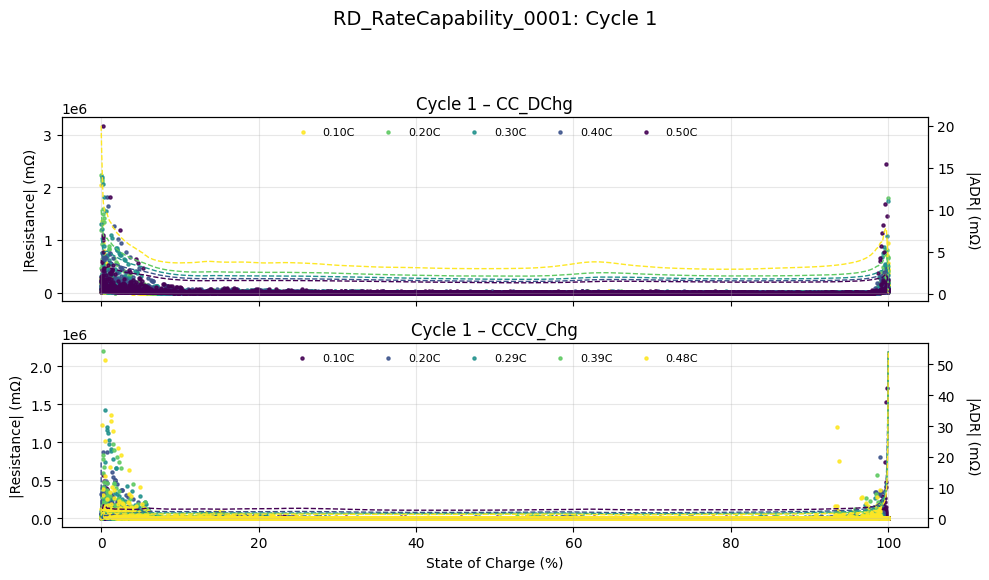

/tmp/ipykernel_1271176/1414844081.py:50: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap("viridis", max(len(rates), 1))
/tmp/ipykernel_1271176/1414844081.py:50: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap("viridis", max(len(rates), 1))


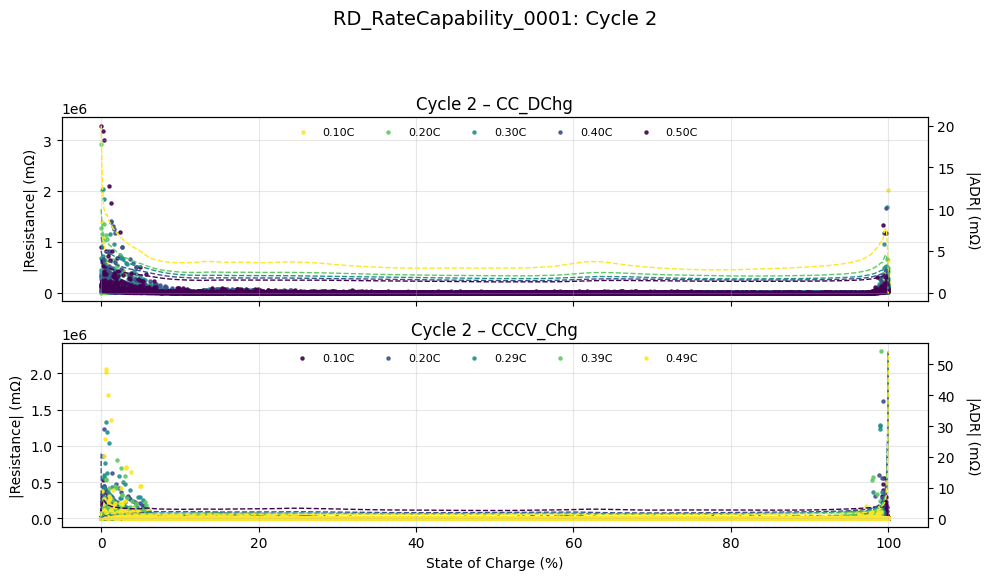

/tmp/ipykernel_1271176/1414844081.py:50: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap("viridis", max(len(rates), 1))
/tmp/ipykernel_1271176/1414844081.py:50: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap("viridis", max(len(rates), 1))


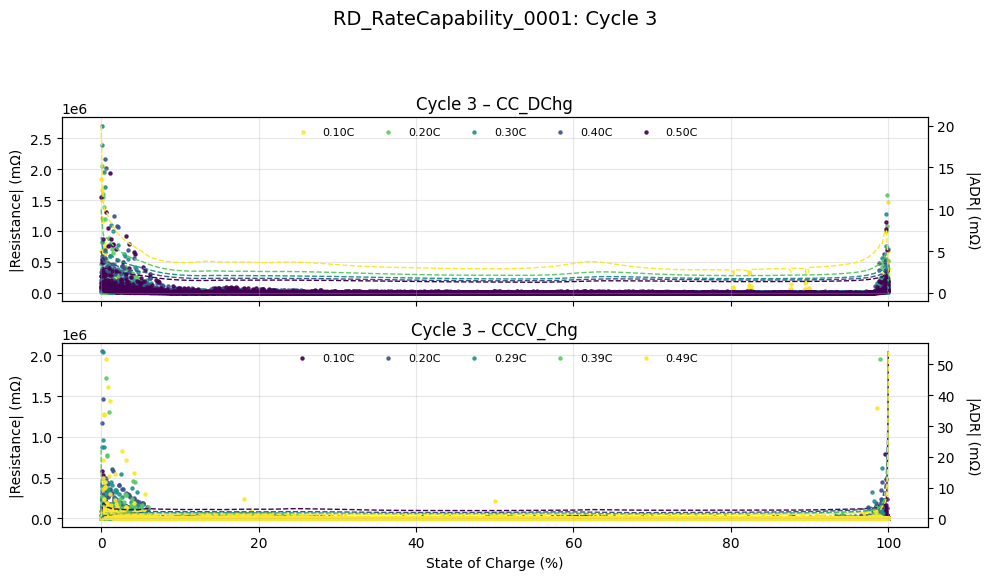

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from pathlib import Path

ADR_DIR = Path("/home/kcv/Desktop/Rate_Capability/results/data/adr_data")
cell_name = "RD_RateCapability_0001"
step_order = ("CC_DChg", "CCCV_Chg")
CRATE_SKIP = 0.33
CRATE_TOL = 0.01

df = pd.read_csv(ADR_DIR / f"{cell_name}_adr_data.csv")

numeric_cols = ["c_rate", "current(a)", "volt(v)", "OCV", "soc(%)",
                "resistance(ohm)", "apparent_direct_resistance(ohm)"]
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

df["resistance(ohm)"] = df["resistance(ohm)"].abs() * 1e3
df["apparent_direct_resistance(ohm)"] = df["apparent_direct_resistance(ohm)"].abs() * 1e3

mask = df["step name"].str.strip().isin(step_order)
df = df[mask]

if "c_rate" in df.columns:
    skip_mask = np.isclose(df["c_rate"].abs(), CRATE_SKIP, atol=CRATE_TOL)
    df = df[~skip_mask]

cycles = sorted(df["cycle no"].dropna().unique())

for cycle in cycles:
    cycle_df = df[df["cycle no"] == cycle]
    if cycle_df.empty:
        continue

    fig, axes = plt.subplots(len(step_order), 1, figsize=(10, 6), sharex=True)
    axes = np.atleast_1d(axes)

    for ax, step in zip(axes, step_order):
        step_df = cycle_df[cycle_df["step name"].str.strip() == step]
        step_df = step_df.dropna(subset=["soc(%)"])
        if step_df.empty:
            ax.text(0.5, 0.5, f"No data for {step}", ha="center", va="center")
            ax.axis("off")
            continue

        rates = sorted(step_df["c_rate"].dropna().unique())
        cmap = get_cmap("viridis", max(len(rates), 1))
        rate_colors = {rate: cmap(idx) for idx, rate in enumerate(rates)}
        ax2 = ax.twinx()

        handles, labels = [], []
        for _, grp in step_df.groupby("step no"):
            grp = grp.sort_values("soc(%)")
            rate = grp["c_rate"].iloc[0]
            label = f"{abs(rate):.2f}C" if pd.notna(rate) else "Unknown C-rate"
            color = rate_colors.get(rate, "tab:gray")

            h = ax.scatter(grp["soc(%)"], grp["resistance(ohm)"],
                           color=color, s=5, alpha=0.85)
            ax2.plot(grp["soc(%)"], grp["apparent_direct_resistance(ohm)"],
                     color=color, linestyle="--", linewidth=1)
            handles.append(h)
            labels.append(label)

        ax.set_ylabel("|Resistance| (mΩ)")
        ax2.set_ylabel("|ADR| (mΩ)", rotation=-90, labelpad=18)
        ax.set_title(f"Cycle {cycle} – {step}")
        ax.grid(alpha=0.3)
        ax.legend(handles, labels, fontsize=8, loc="upper center",
                  ncol=len(labels), frameon=False)

    axes[-1].set_xlabel("State of Charge (%)")
    fig.suptitle(f"{cell_name}: Cycle {cycle}", fontsize=14, y=0.96)
    fig.tight_layout(rect=[0, 0, 1, 0.9])
    plt.show()


/tmp/ipykernel_1273366/287441356.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap("viridis", len(ALLOWED_RATES))


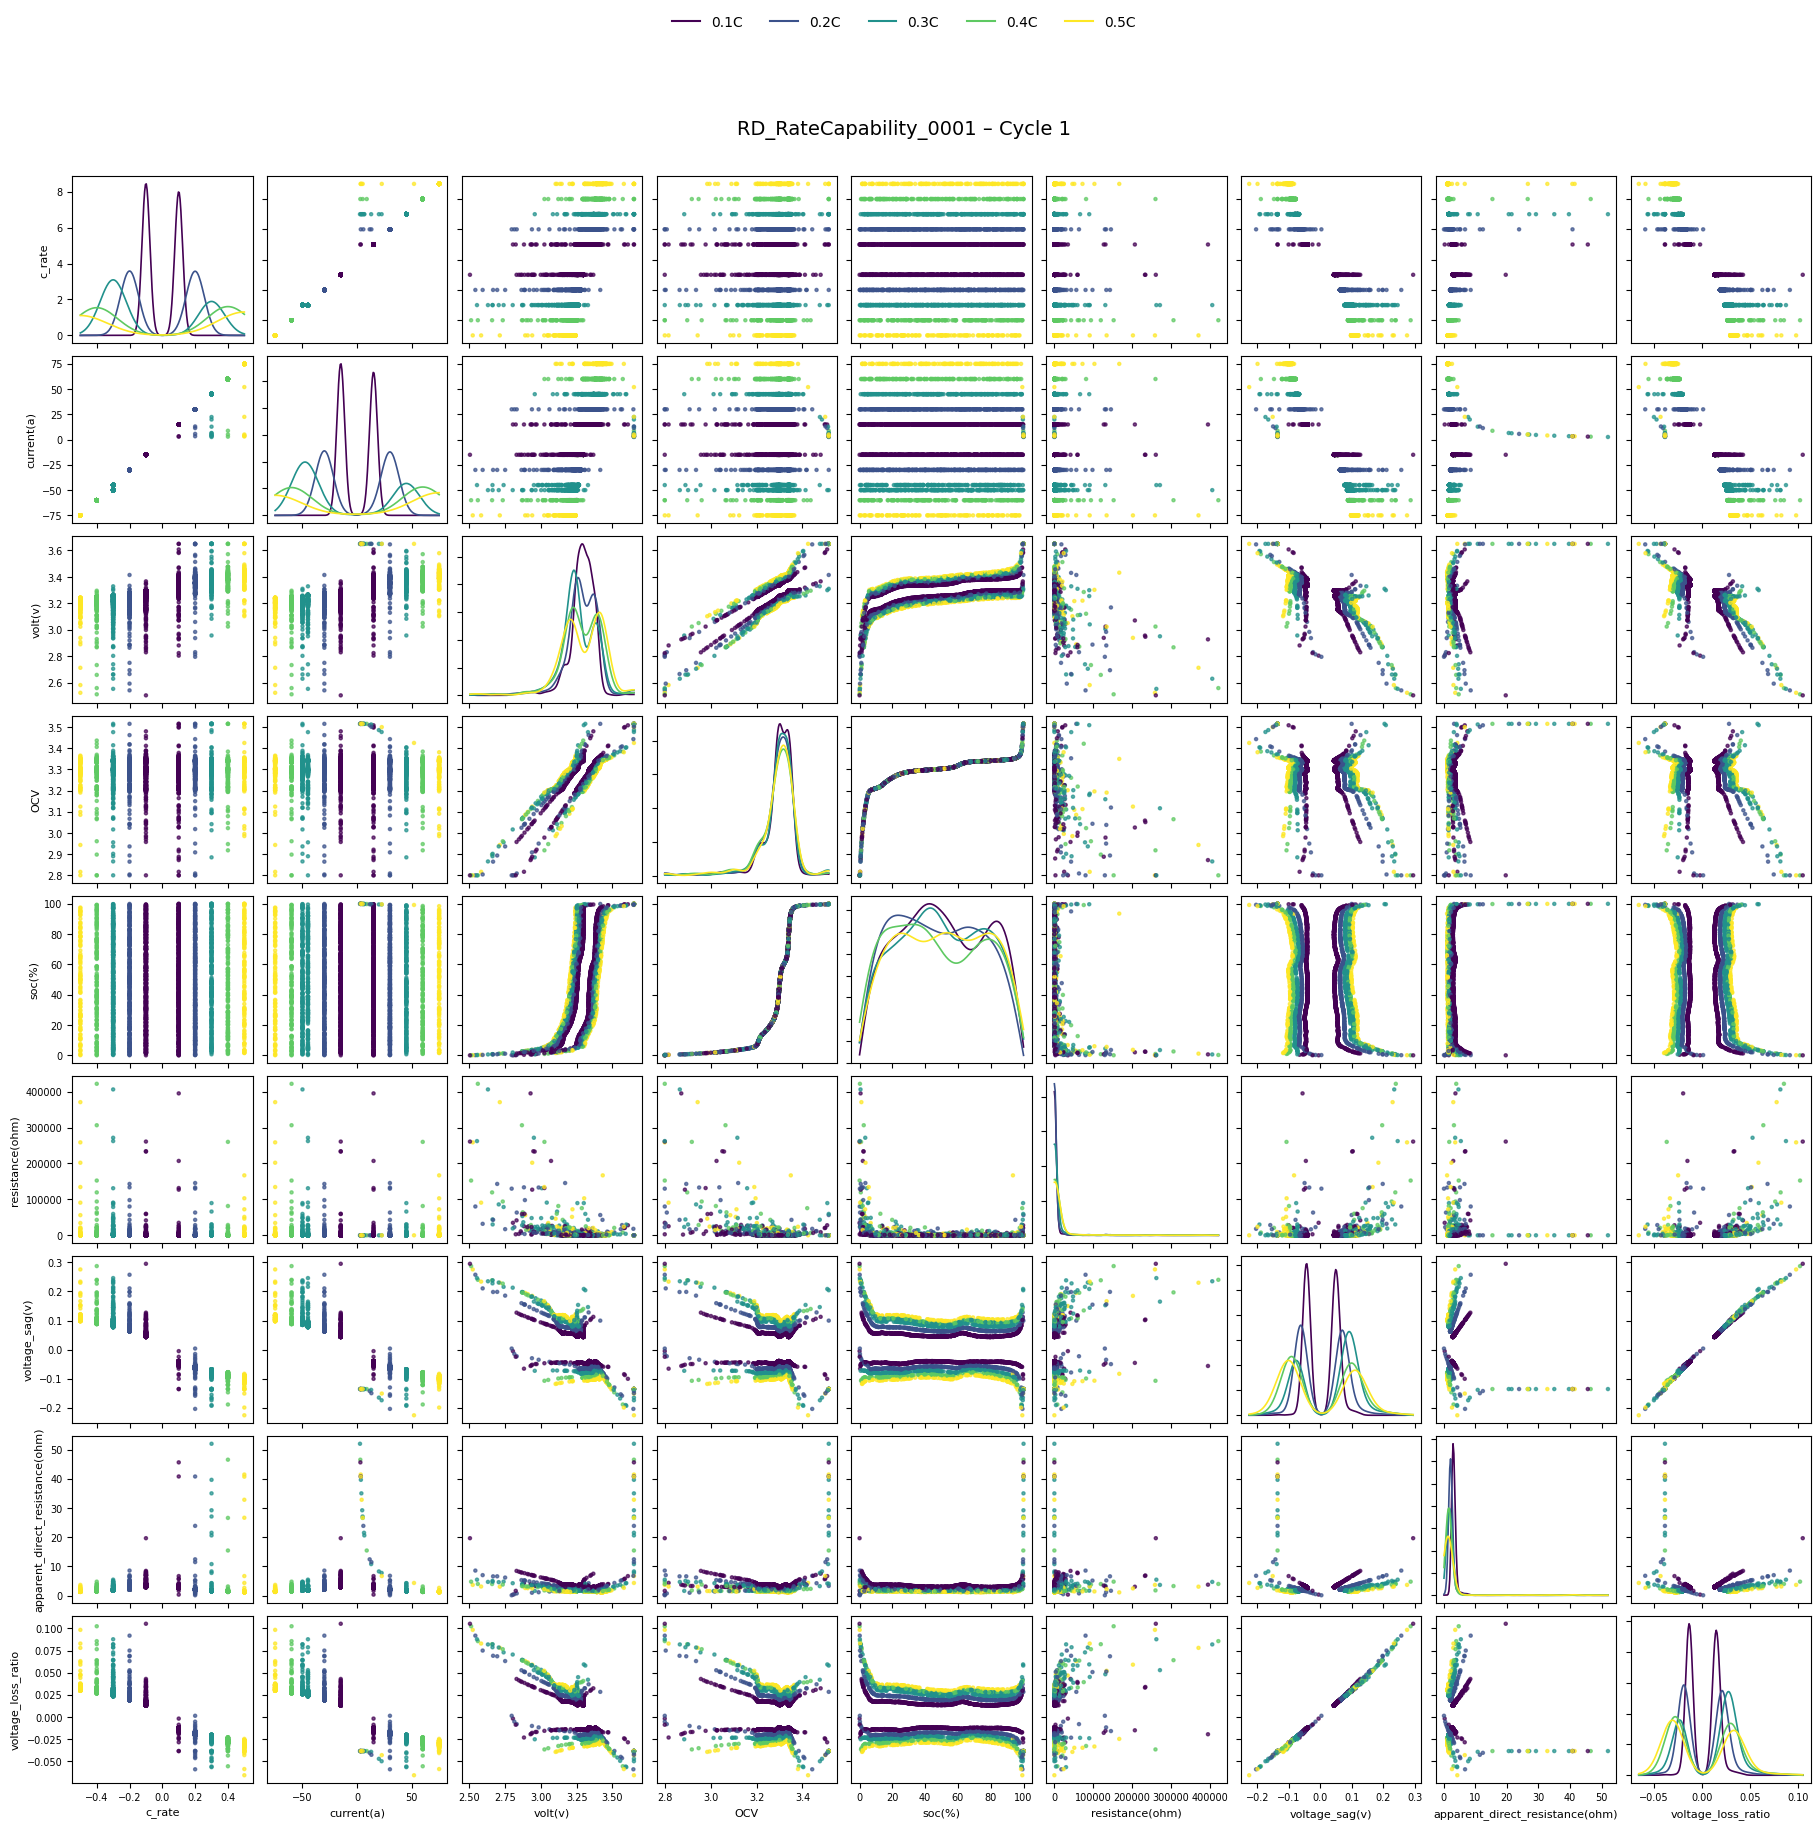

/tmp/ipykernel_1273366/287441356.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap("viridis", len(ALLOWED_RATES))


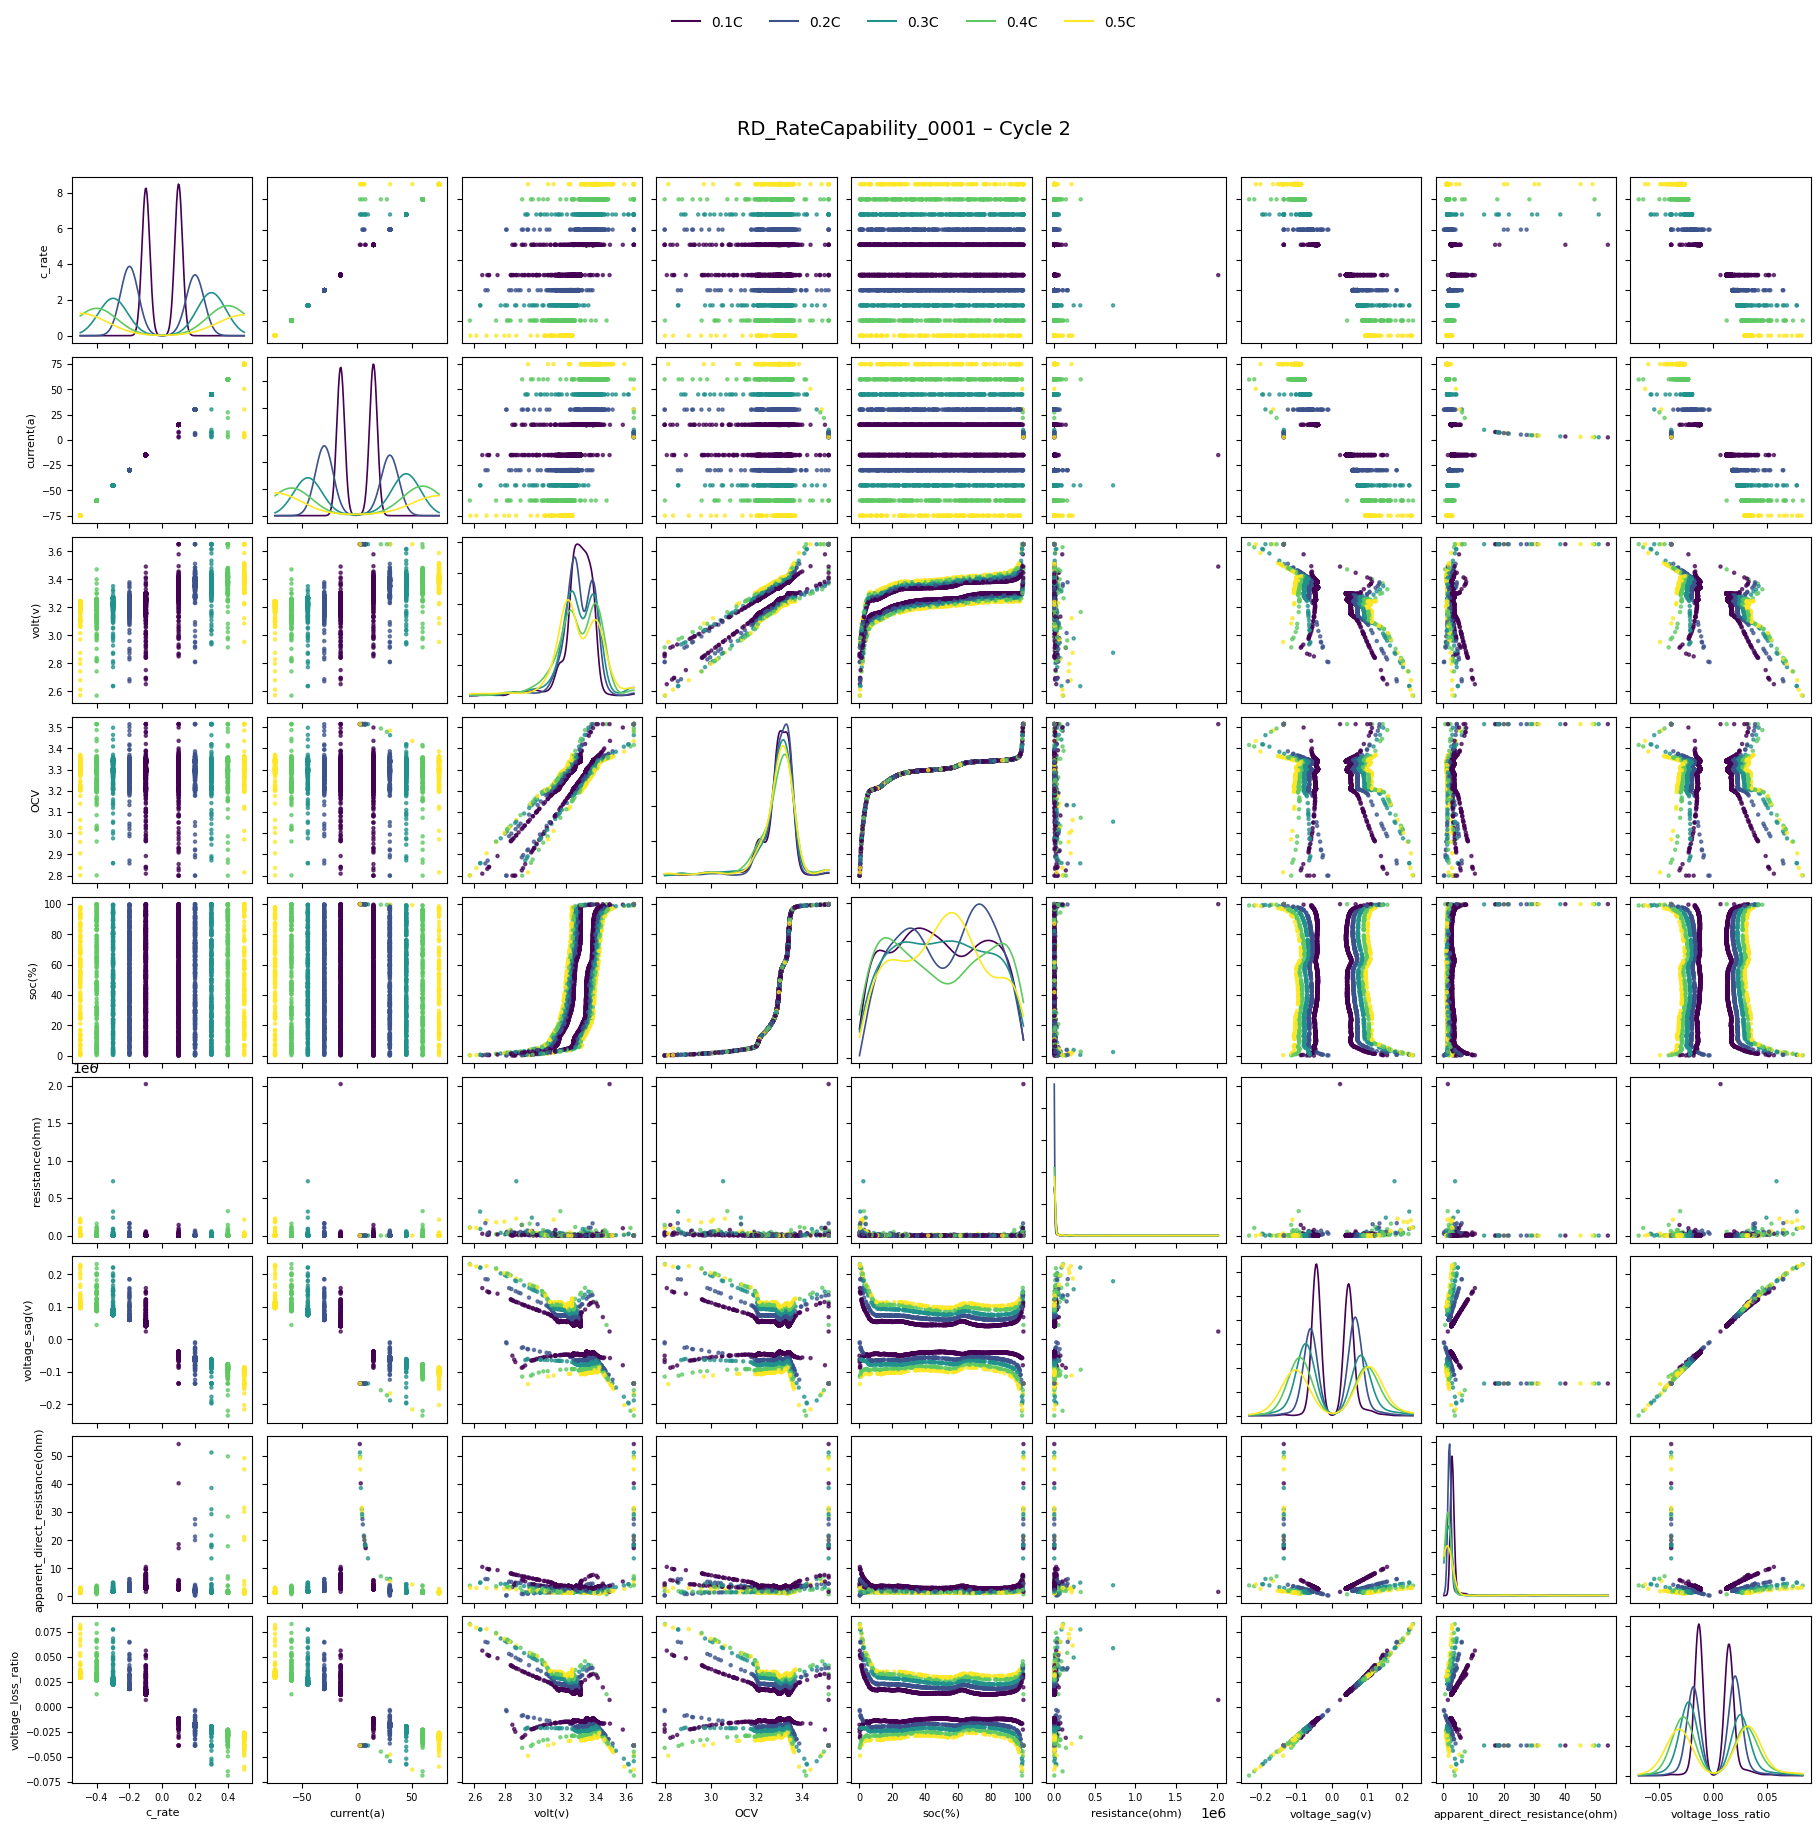

/tmp/ipykernel_1273366/287441356.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap("viridis", len(ALLOWED_RATES))


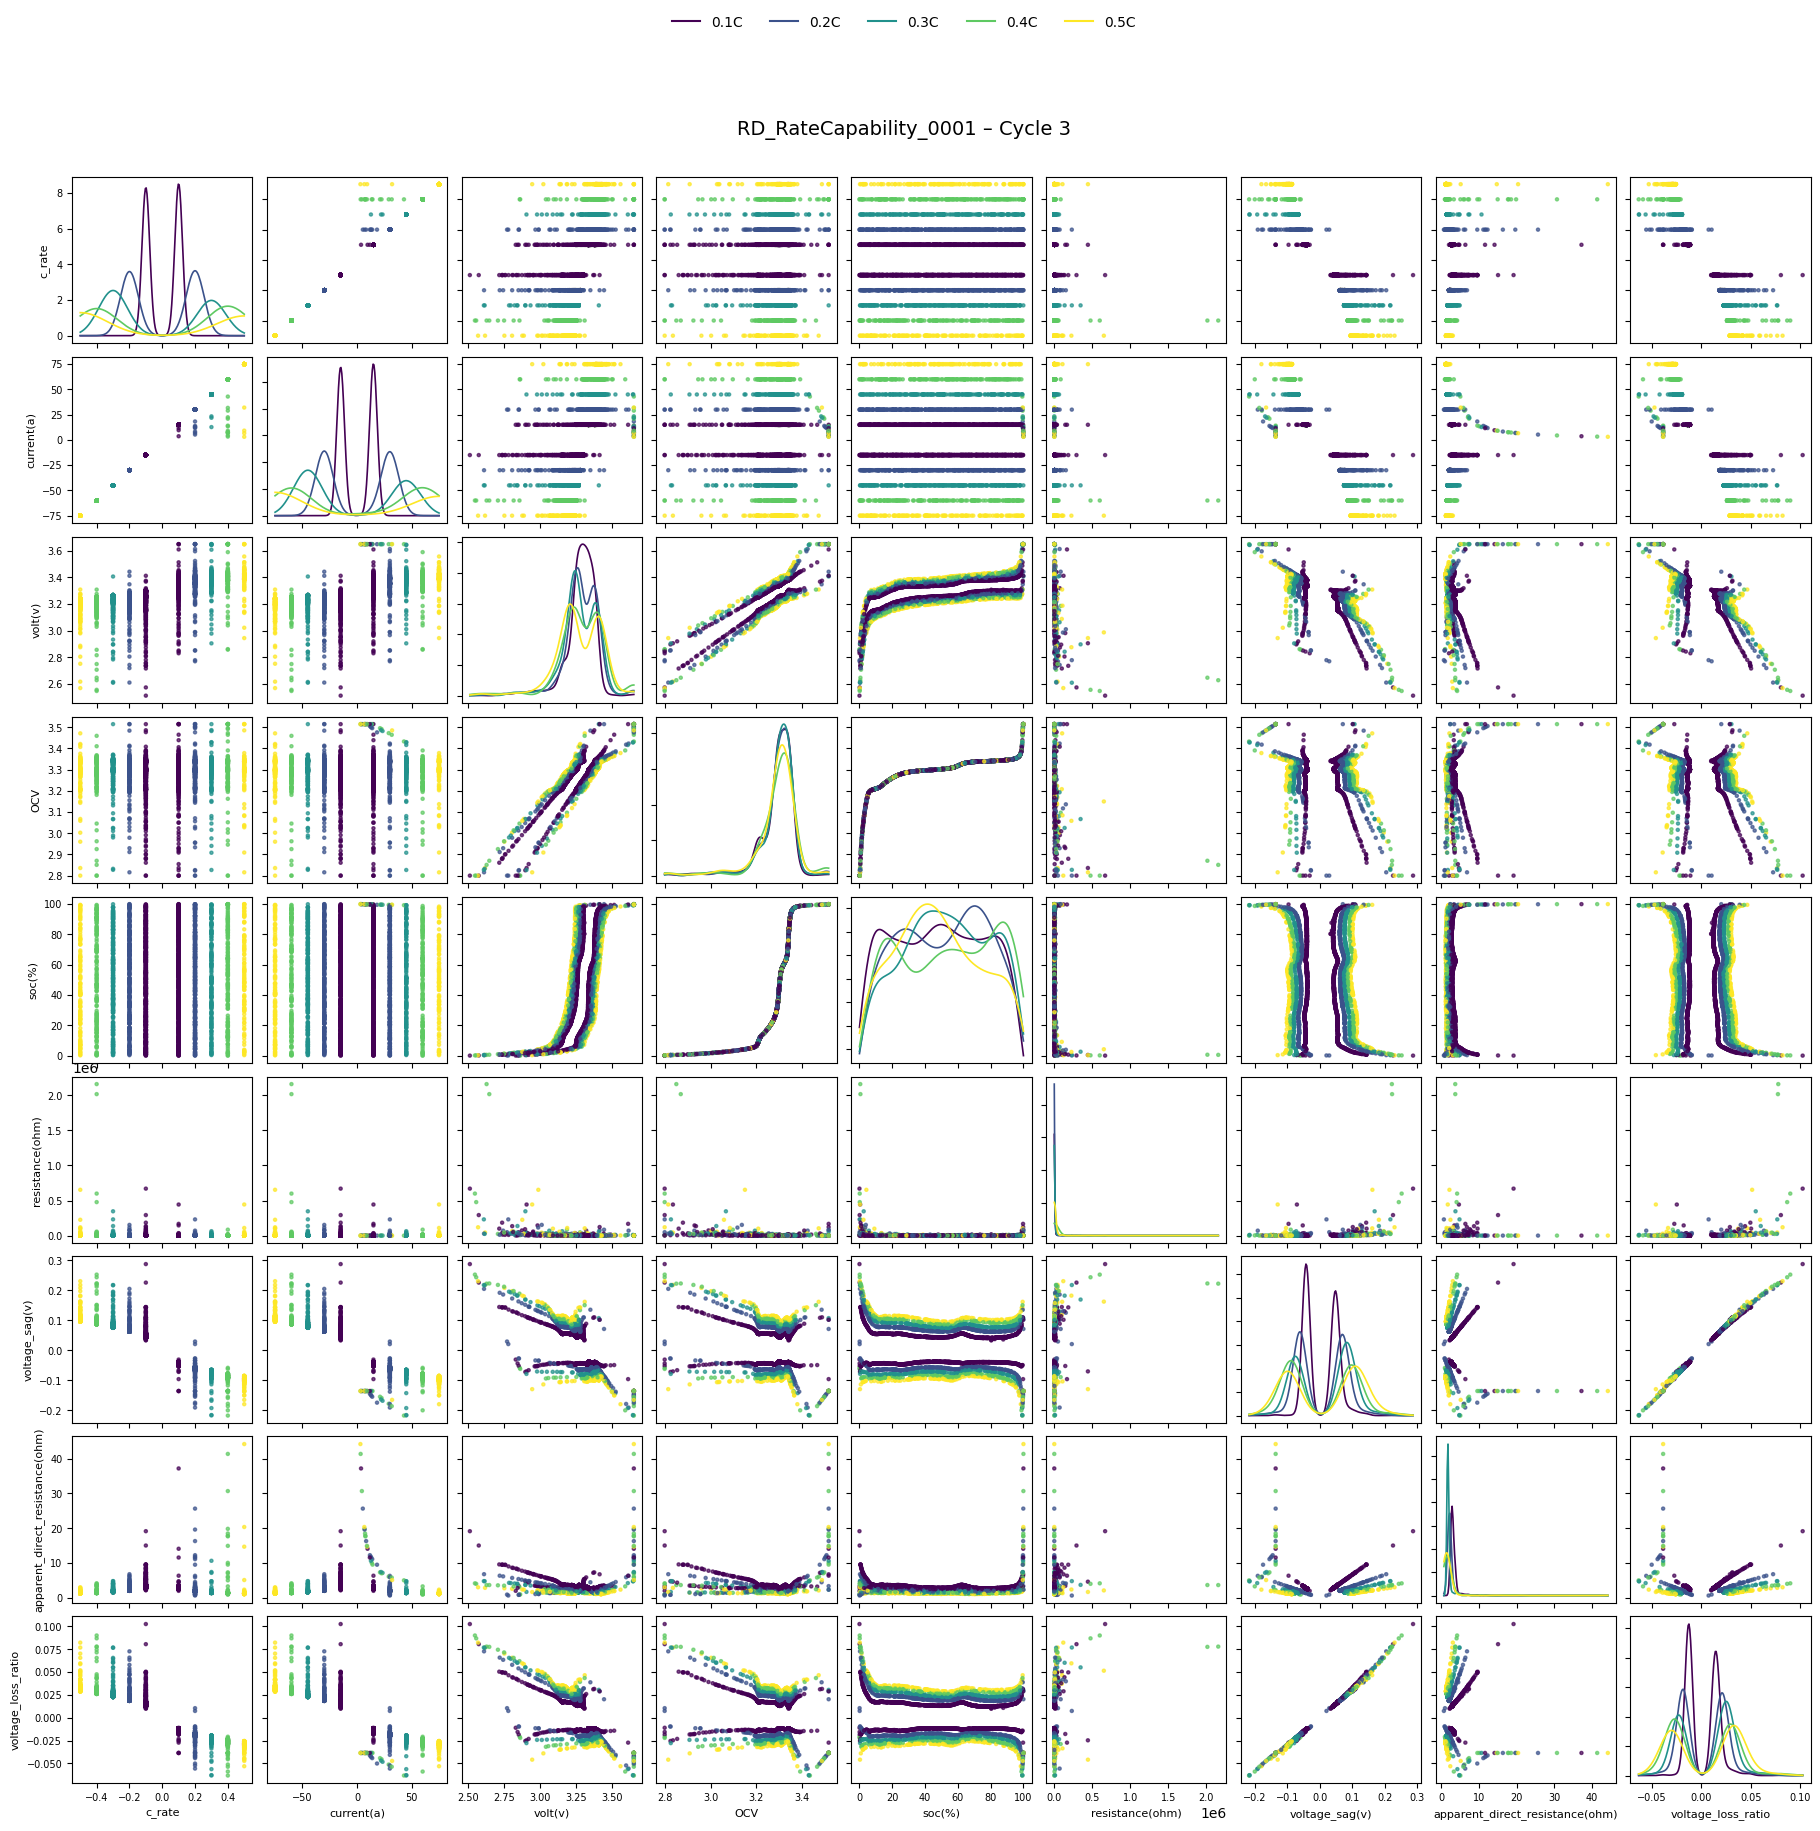

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from scipy.stats import gaussian_kde
from pathlib import Path

ADR_DIR = Path("/home/kcv/Desktop/Rate_Capability/results/data/adr_data")
cell_name = "RD_RateCapability_0001"
step_order = ("CC_DChg", "CCCV_Chg")
FEATURES = [
    "c_rate", "current(a)", "volt(v)", "OCV", "soc(%)",
    "resistance(ohm)", "voltage_sag(v)",
    "apparent_direct_resistance(ohm)", "voltage_loss_ratio",
]
ALLOWED_RATES = np.array([0.1, 0.2, 0.3, 0.4, 0.5])
MAX_POINTS = 3000  # downsample per cycle to keep plotting responsive

def snap_c_rate(val: float) -> float:
    if pd.isna(val):
        return np.nan
    sign = np.sign(val) if val else 1.0
    target = ALLOWED_RATES[np.argmin(np.abs(ALLOWED_RATES - abs(val)))]
    return sign * target

df = pd.read_csv(ADR_DIR / f"{cell_name}_adr_data.csv")
df = df[df["step name"].str.strip().isin(step_order)].copy()
df["cycle no"] = pd.to_numeric(df["cycle no"], errors="coerce")
df["c_rate"] = pd.to_numeric(df["c_rate"], errors="coerce").apply(snap_c_rate)

for col in FEATURES:
    df[col] = pd.to_numeric(df[col], errors="coerce")

df["resistance(ohm)"] = df["resistance(ohm)"].abs() * 1e3
df["apparent_direct_resistance(ohm)"] = df["apparent_direct_resistance(ohm)"].abs() * 1e3

cycles = sorted(df["cycle no"].dropna().unique())

for cycle in cycles:
    cyc = df[df["cycle no"] == cycle].dropna(subset=FEATURES)
    if cyc.empty:
        continue
    if len(cyc) > MAX_POINTS:
        cyc = cyc.sample(MAX_POINTS, random_state=0)

    rates = np.sort(cyc["c_rate"].unique())
    n = len(FEATURES)
    fig, axes = plt.subplots(n, n, figsize=(2.1 * n, 2.1 * n))
    cmap = get_cmap("viridis", len(ALLOWED_RATES))
    norm = plt.Normalize(vmin=ALLOWED_RATES.min(), vmax=ALLOWED_RATES.max())

    for i, fy in enumerate(FEATURES):
        for j, fx in enumerate(FEATURES):
            ax = axes[i, j]
            if i == j:
                xs = np.linspace(cyc[fx].min(), cyc[fx].max(), 200)
                for rate in ALLOWED_RATES:
                    rate_mask = np.isclose(np.abs(cyc["c_rate"]), rate, atol=1e-6)
                    data = cyc.loc[rate_mask, fx]
                    if len(data) < 10 or np.isclose(data.var(), 0.0):
                        continue
                    kde = gaussian_kde(data)
                    ax.plot(xs, kde(xs), color=cmap(norm(rate)), linewidth=1.2)
            else:
                ax.scatter(
                    cyc[fx], cyc[fy],
                    c=np.abs(cyc["c_rate"]),
                    cmap=cmap,
                    norm=norm,
                    s=5,
                    alpha=0.7,
                )
            if i == n - 1:
                ax.set_xlabel(fx, fontsize=8)
            else:
                ax.set_xticklabels([])
            if j == 0:
                ax.set_ylabel(fy, fontsize=8)
            else:
                ax.set_yticklabels([])
            ax.tick_params(labelsize=7)

    legend_handles = [
        plt.Line2D([], [], color=cmap(norm(rate)),
                   label=f"{rate:.1f}C", linewidth=1.5)
        for rate in ALLOWED_RATES
    ]
    fig.legend(
        handles=legend_handles,
        loc="upper center",
        ncol=len(ALLOWED_RATES),
        frameon=False,
        bbox_to_anchor=(0.5, 0.992),
    )

    fig.suptitle(f"{cell_name} – Cycle {int(cycle)}", fontsize=14, y=0.93)
    fig.subplots_adjust(left=0.06, right=0.98, bottom=0.05, top=0.9, wspace=0.08, hspace=0.08)
    plt.show()


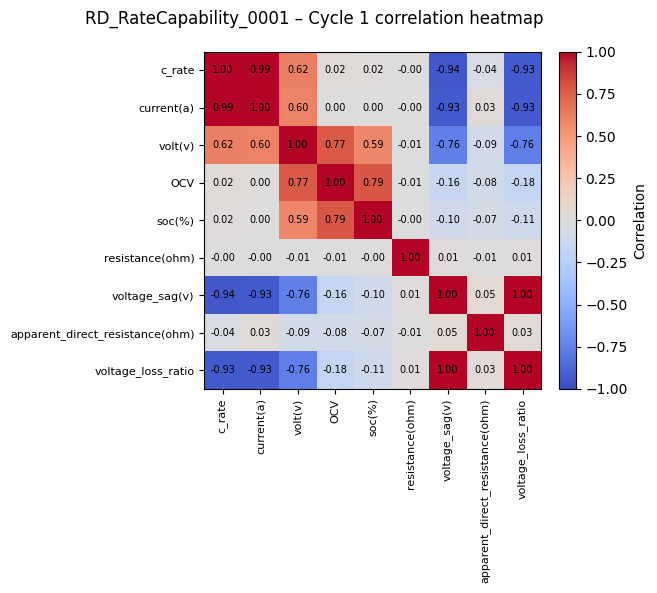

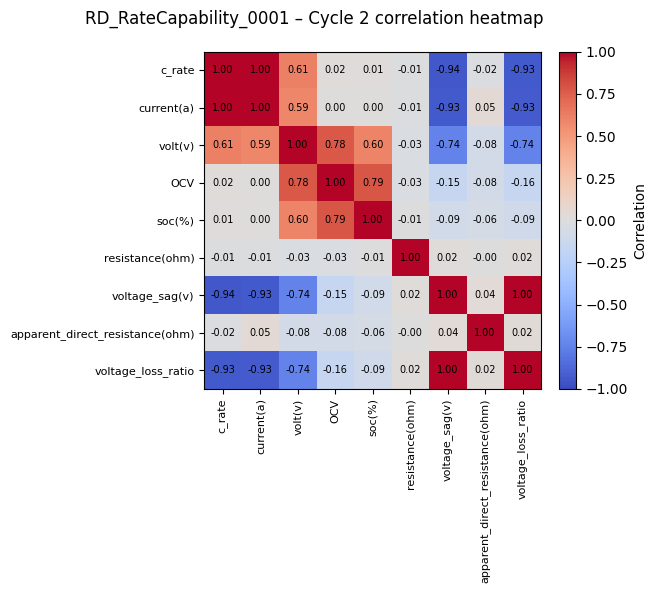

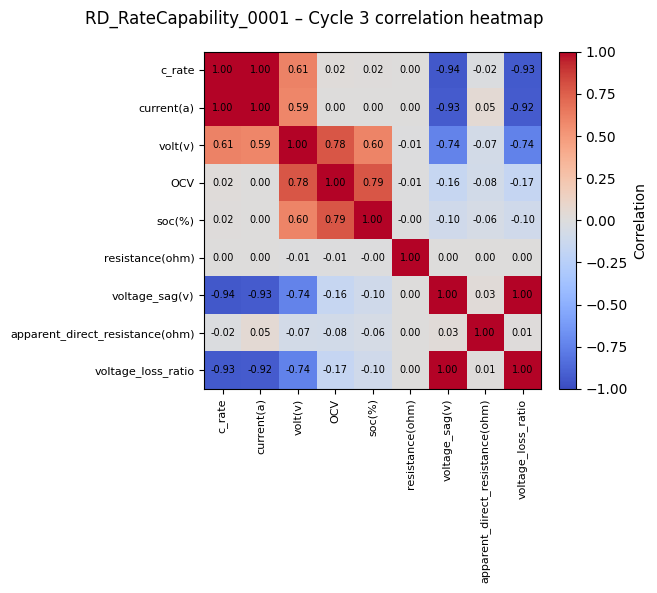

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

ADR_DIR = Path("/home/kcv/Desktop/Rate_Capability/results/data/adr_data")
cell_name = "RD_RateCapability_0001"
step_order = ("CC_DChg", "CCCV_Chg")
FEATURES = [
    "c_rate",
    "current(a)",
    "volt(v)",
    "OCV",
    "soc(%)",
    "resistance(ohm)",
    "voltage_sag(v)",
    "apparent_direct_resistance(ohm)",
    "voltage_loss_ratio",
]
ALLOWED_RATES = np.array([0.1, 0.2, 0.3, 0.4, 0.5])

def snap_c_rate(val):
    if pd.isna(val):
        return np.nan
    sign = np.sign(val) if val else 1.0
    return sign * ALLOWED_RATES[np.argmin(np.abs(ALLOWED_RATES - abs(val)))]

df = pd.read_csv(ADR_DIR / f"{cell_name}_adr_data.csv")
df = df[df["step name"].str.strip().isin(step_order)].copy()
df["cycle no"] = pd.to_numeric(df["cycle no"], errors="coerce")
df["c_rate"] = pd.to_numeric(df["c_rate"], errors="coerce").apply(snap_c_rate)

for col in FEATURES:
    df[col] = pd.to_numeric(df[col], errors="coerce")

cycles = sorted(df["cycle no"].dropna().unique())

for cycle in cycles:
    subset = df[df["cycle no"] == cycle].dropna(subset=FEATURES)
    if subset.empty:
        continue

    corr = subset[FEATURES].corr()

    fig, ax = plt.subplots(figsize=(7, 6))
    im = ax.imshow(corr, cmap="coolwarm", vmin=-1, vmax=1)
    ax.set_xticks(range(len(FEATURES)))
    ax.set_xticklabels(FEATURES, rotation=90, fontsize=8)
    ax.set_yticks(range(len(FEATURES)))
    ax.set_yticklabels(FEATURES, fontsize=8)

    for i in range(len(FEATURES)):
        for j in range(len(FEATURES)):
            ax.text(j, i, f"{corr.iloc[i, j]:.2f}", ha="center", va="center", fontsize=7)

    fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04, label="Correlation")
    fig.suptitle(f"{cell_name} – Cycle {int(cycle)} correlation heatmap", fontsize=12)
    fig.tight_layout()
    plt.show()
